In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Preview structure
print("Dataset shape:", df.shape)
df.head()



Dataset shape: (429435, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [3]:

# Check column names
df.columns

# Summary of missing values
df.isnull().sum()



iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [4]:




# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter a few countries of interest
countries = ['Kenya', 'India', 'United States']
df_filtered = df[df['location'].isin(countries)]

# Drop rows with missing crucial values
df_filtered = df_filtered.dropna(subset=['total_cases', 'total_deaths'])

# Fill missing numeric values
df_filtered.fillna(0, inplace=True)

df_filtered.head()



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
173549,IND,Asia,India,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173550,IND,Asia,India,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173551,IND,Asia,India,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173552,IND,Asia,India,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0
173553,IND,Asia,India,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1417173120,0.0,0.0,0.0,0.0


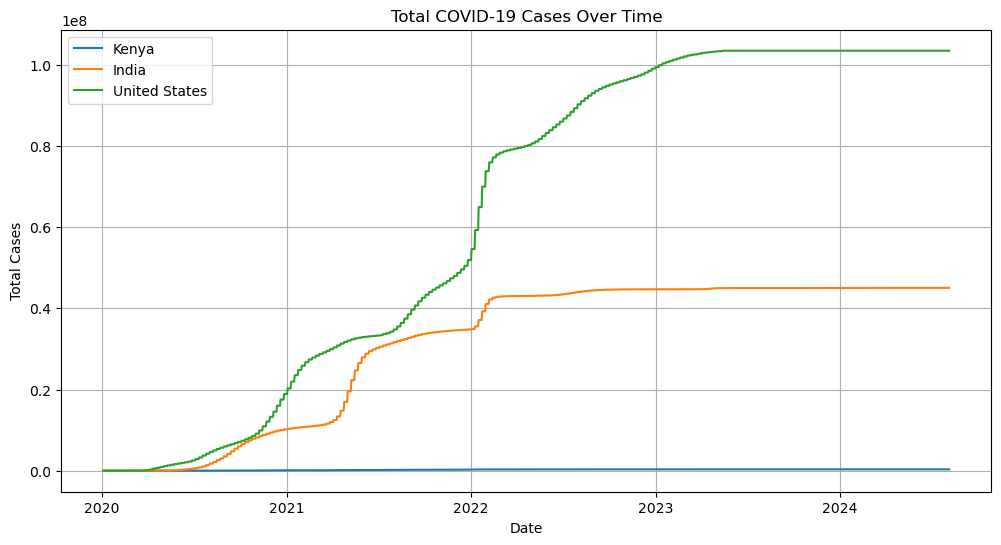

In [5]:



import matplotlib.pyplot as plt
import seaborn as sns

# Line chart: Total cases over time
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.show()


In [7]:



df_filtered['death_rate'] = df_filtered['total_deaths'] / df_filtered['total_cases']


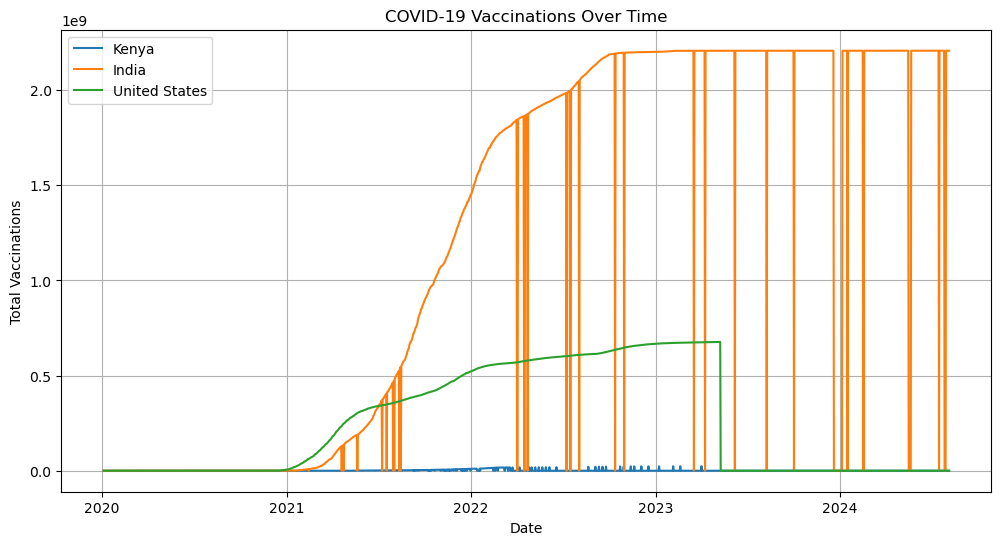

In [8]:
# Line chart: Cumulative vaccinations
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_filtered[df_filtered['location'] == country]
    plt.plot(data['date'], data['total_vaccinations'], label=country)

plt.title('COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
plt.savefig('images/total_cases.png')  # This saves the plot as an image


<Figure size 640x480 with 0 Axes>

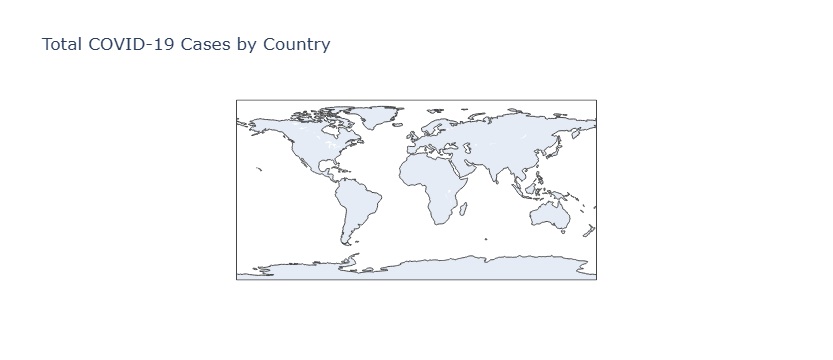

In [11]:
import plotly.express as px

# Get latest data by country
latest_data = df[df['date'] == df['date'].max()]
choropleth_df = latest_data[['iso_code', 'location', 'total_cases']].dropna()

# Create the choropleth map
fig = px.choropleth(
    choropleth_df,
    locations='iso_code',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='OrRd',
    title='Total COVID-19 Cases by Country'
)

fig.show()


In [12]:
# Check for unique values in the 'continent' column
df['continent'].value_counts()

continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
South America    23440
Name: count, dtype: int64

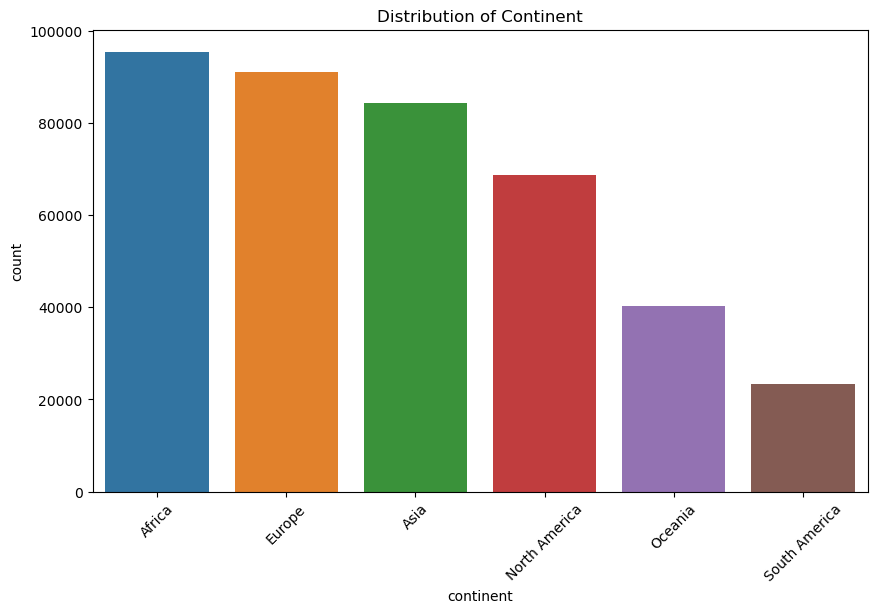

In [13]:



# Plotting the distribution of the continent column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='continent', order=df['continent'].value_counts().index)
plt.title('Distribution of Continent')  
plt.xticks(rotation=45)
plt.show()

In [14]:
# Get total cases by continent as float (not formatted as string/object)
df.groupby('continent')['total_cases'].sum().sort_values(ascending=False)


continent
Asia             2.521673e+11
Europe           2.367567e+11
North America    1.270737e+11
South America    7.348457e+10
Africa           1.461689e+10
Oceania          1.159805e+10
Name: total_cases, dtype: float64

In [ ]:
## 1. Cases by Continent 🌍

This section visualizes the trend of total COVID-19 cases over time for each continent. We’ll explore how different continents experienced the pandemic and identify peaks or flattening of case numbers.


In [16]:
# Plot trends in COVID-19 cases over time by continent
def plot_trends_by_continent(df, continent):
    plt.figure(figsize=(14, 7))
    continent_data = df[df['continent'] == continent]
    sns.lineplot(data=continent_data, x='date', y='total_cases', label=continent)
    plt.title(f'Trends in COVID-19 Cases Over Time in {continent}')
    plt.xlabel('Date')
    plt.ylabel('Total Cases')
    plt.legend()
    plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



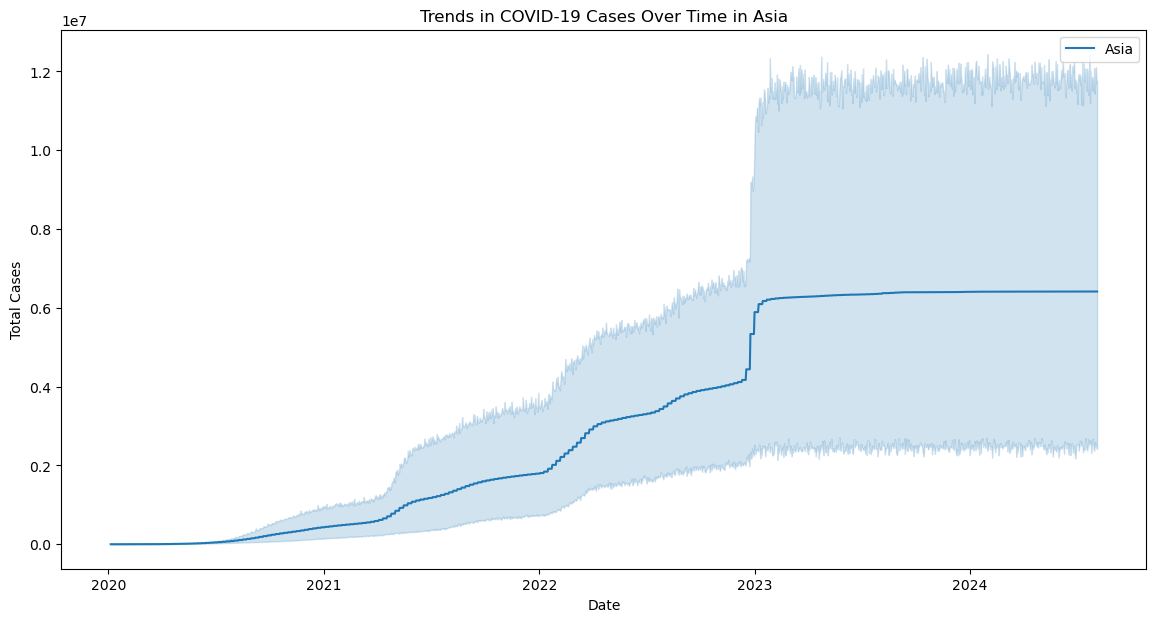

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


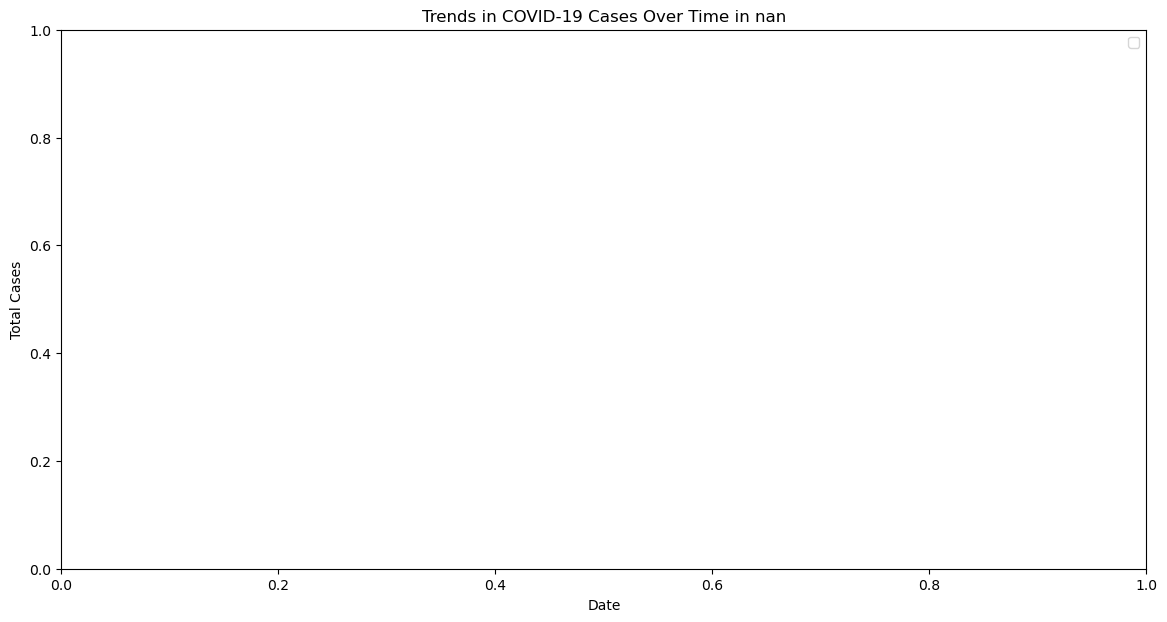

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



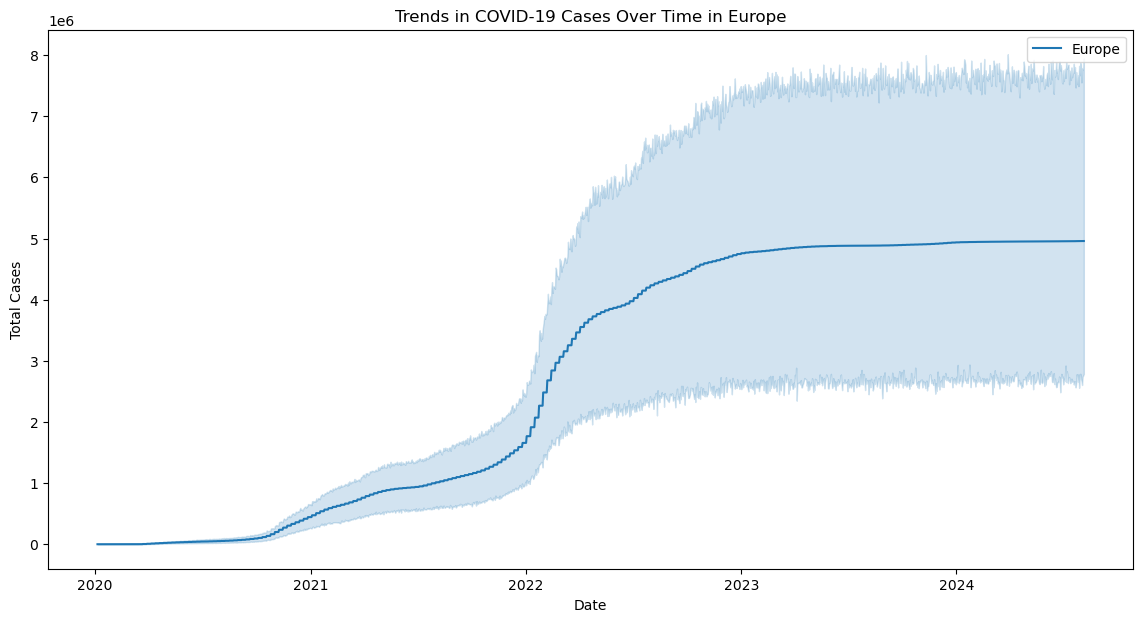

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



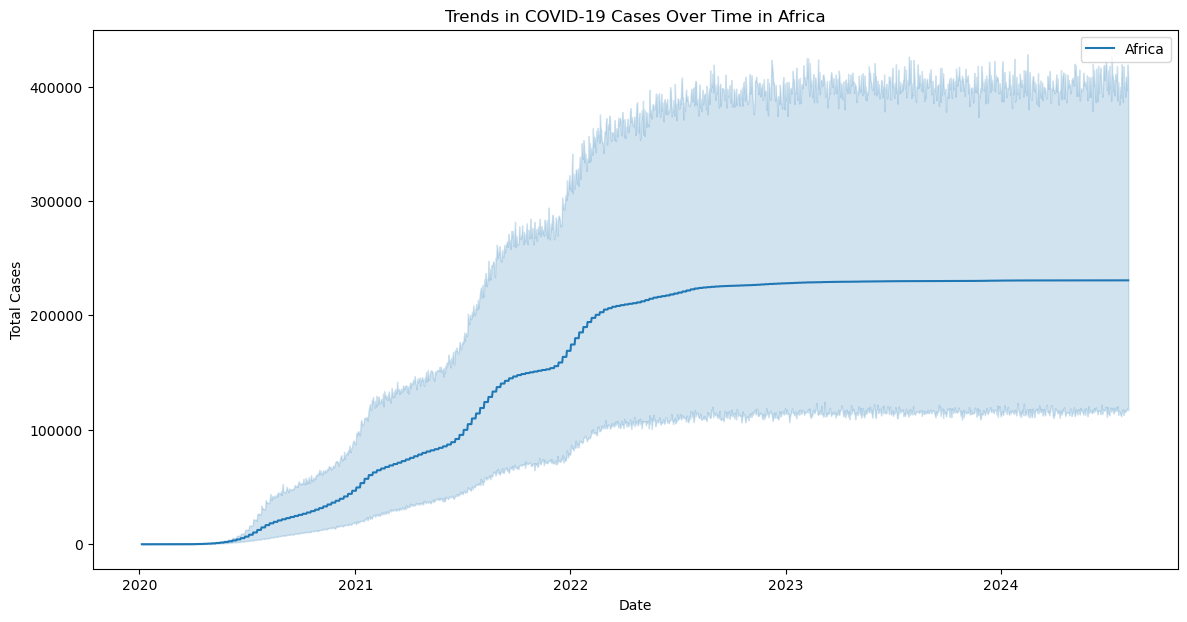

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



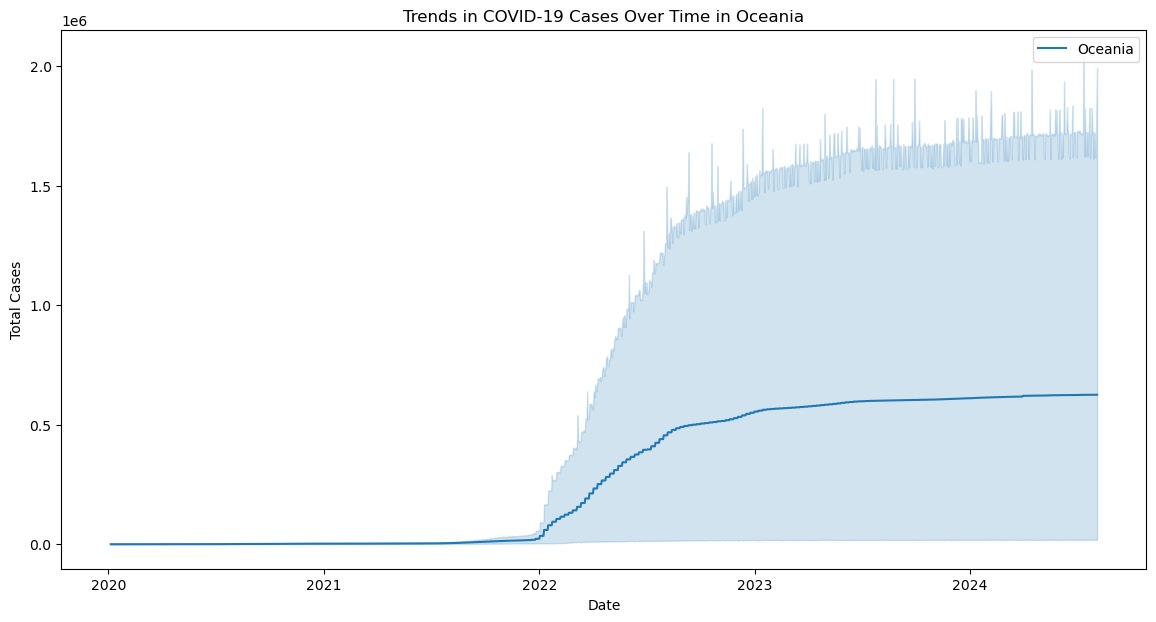

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



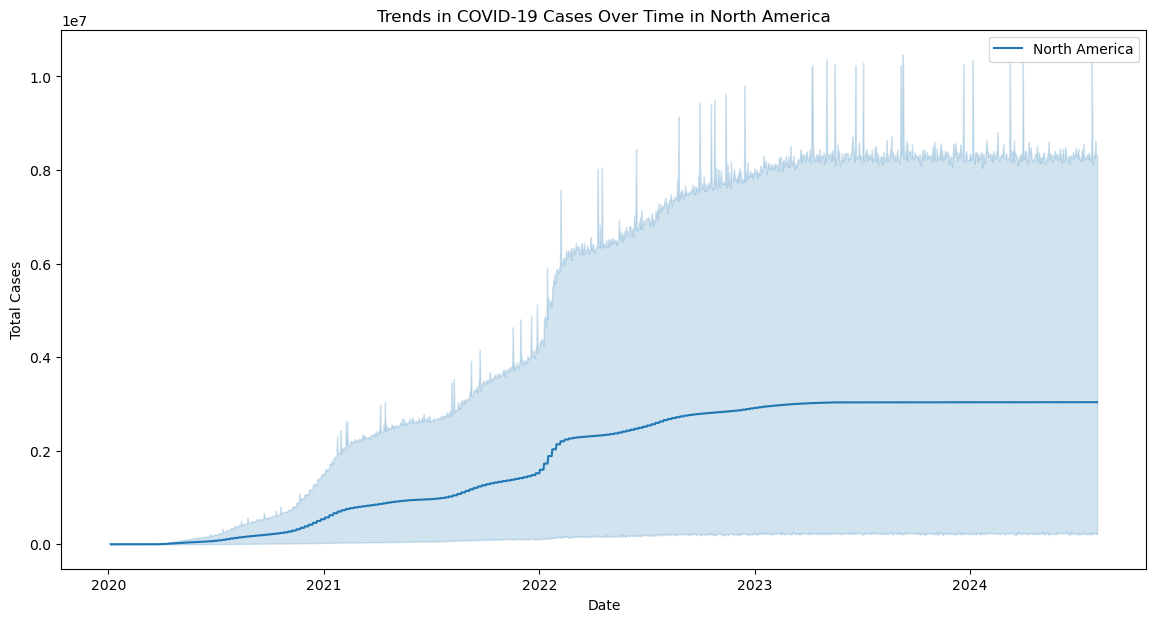

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



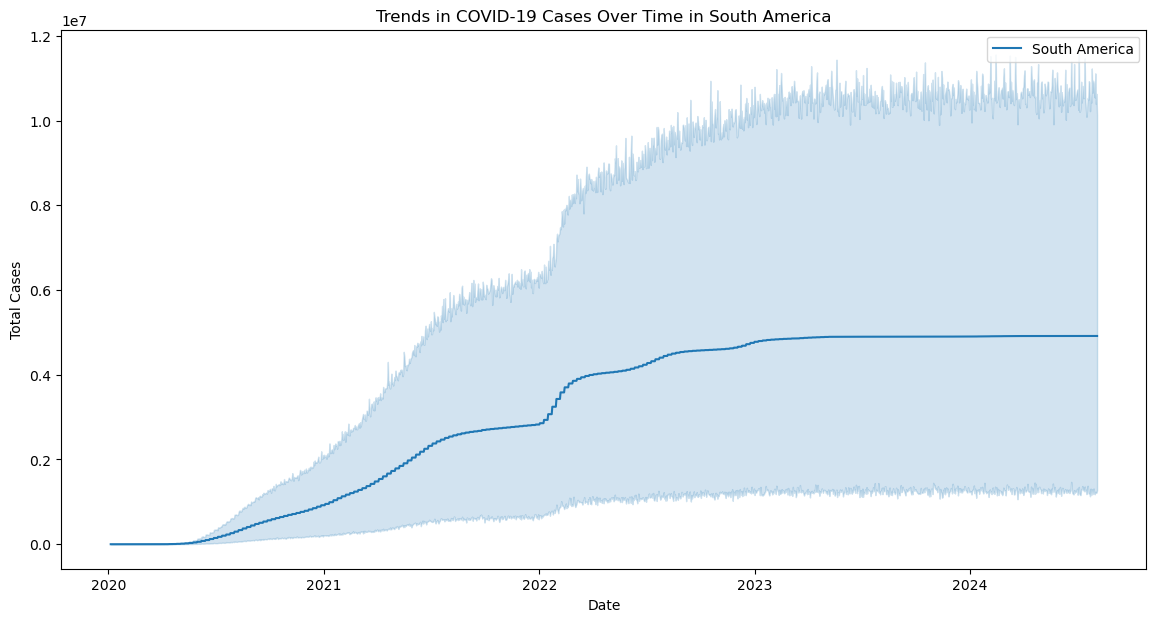

In [17]:
# Plot for all continents
continents = df['continent'].unique()
for continent in continents:
    plot_trends_by_continent(df, continent)


In [18]:


## 2. Deaths by Continent 🕊️

This section visualizes the trend of total COVID-19 deaths over time for each continent. It helps us understand the severity and fatality patterns of the pandemic across different regions.


SyntaxError: invalid syntax (1872733999.py, line 3)

In [20]:
def plot_deaths_by_continent(df, continent):
    plt.figure(figsize=(14, 7))
    continent_data = df[df['continent'] == continent]
    sns.lineplot(data=continent_data, x='date', y='total_deaths', label=continent)
    plt.title(f'Trends in COVID-19 Deaths Over Time in {continent}')
    plt.xlabel('Date')
    plt.ylabel('Total Deaths')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend()
    plt.show()


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



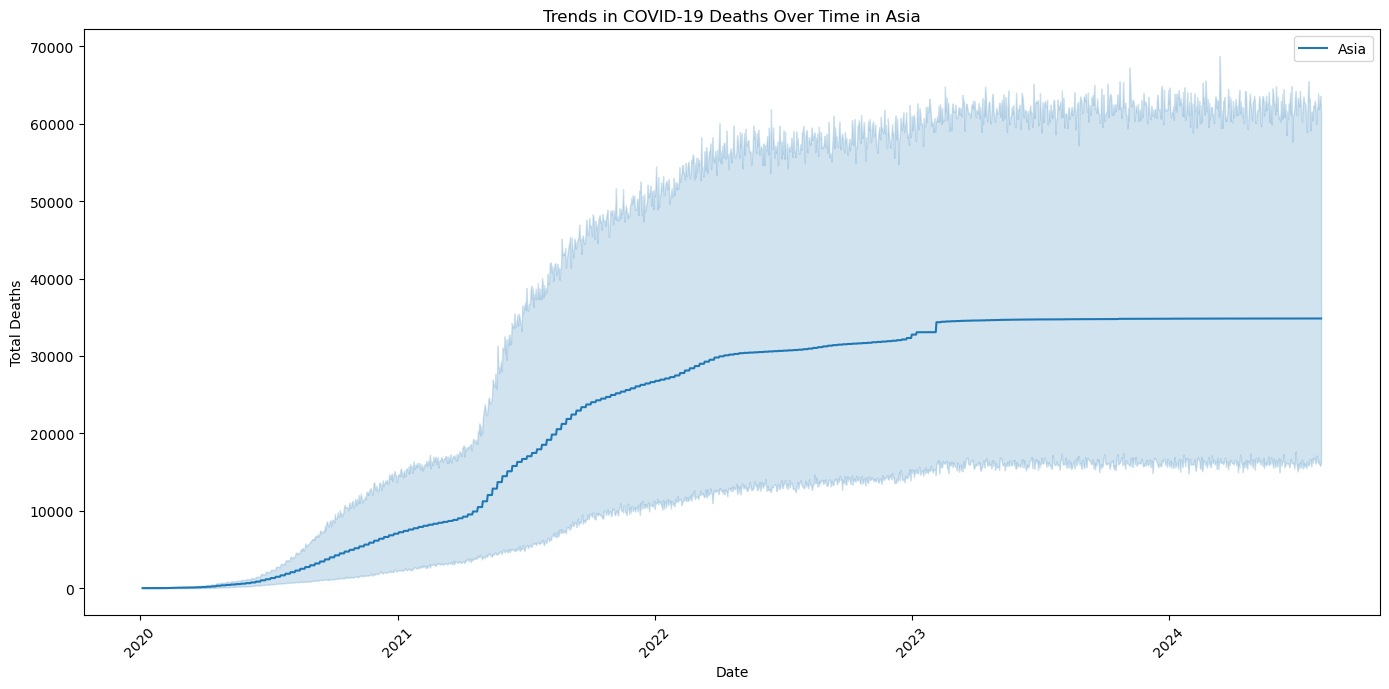

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



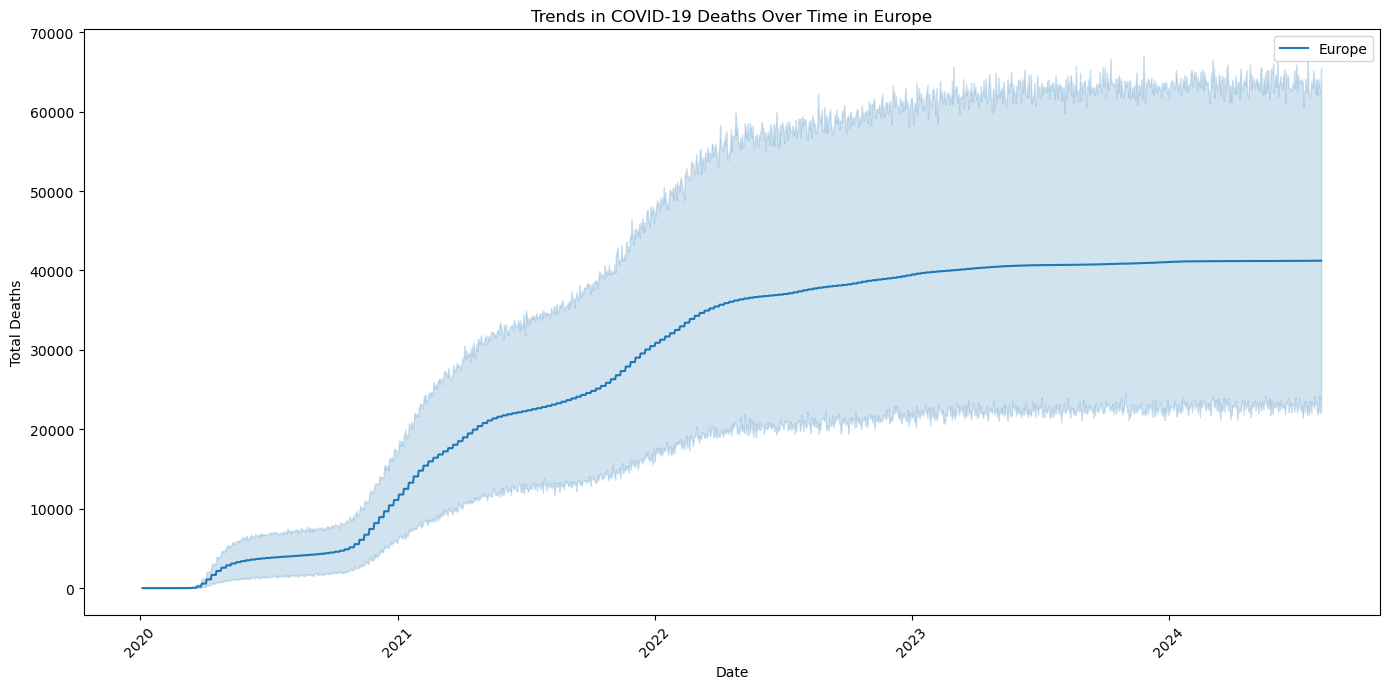

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



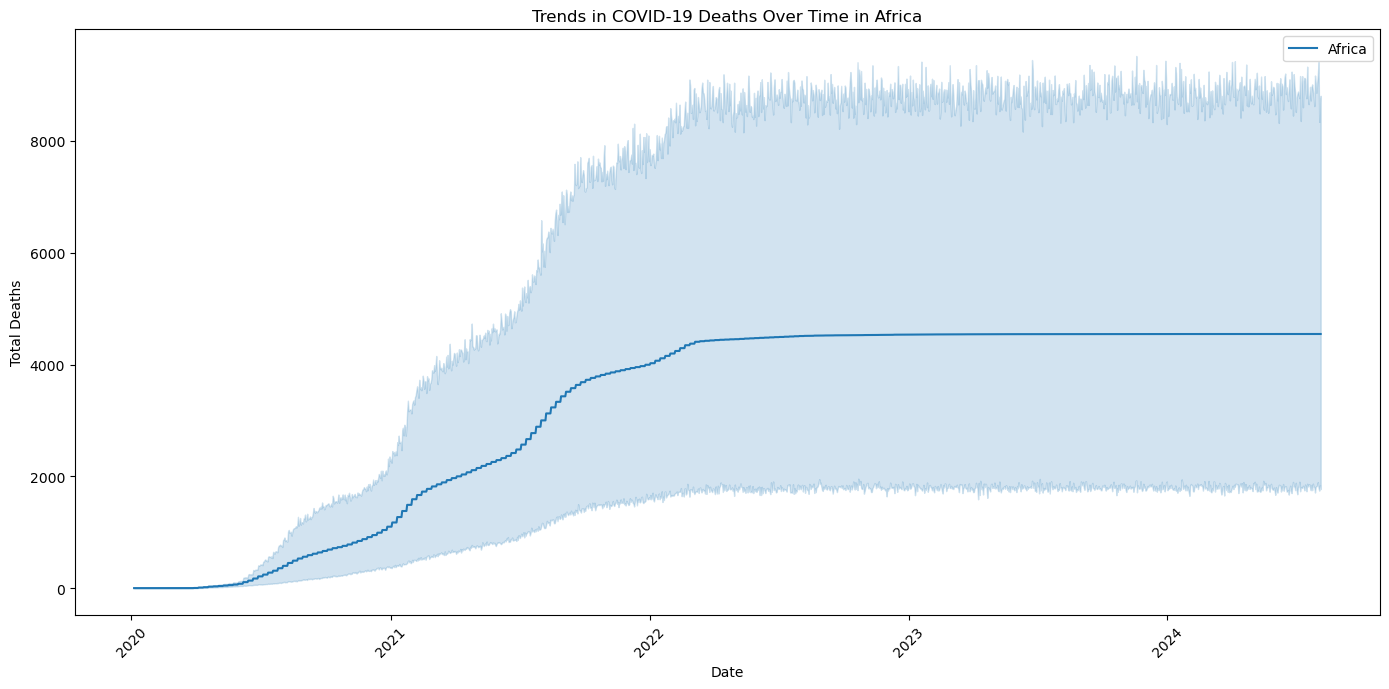

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



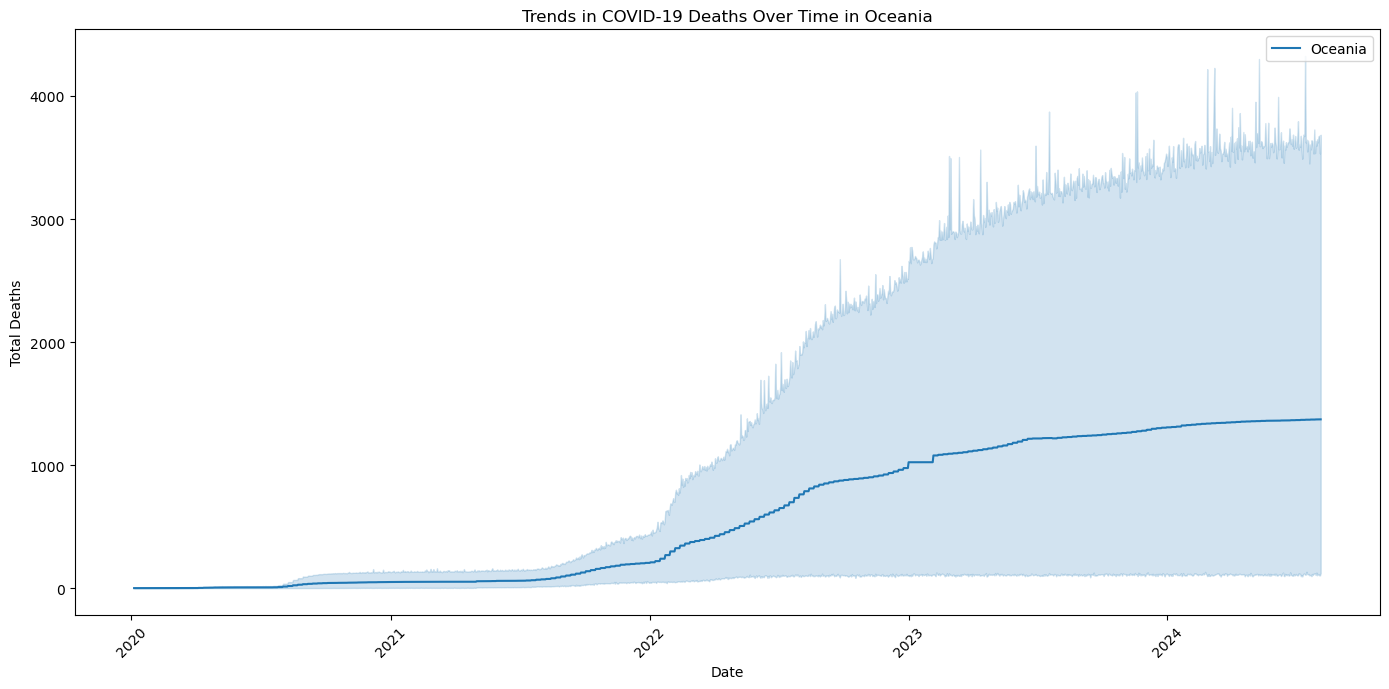

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



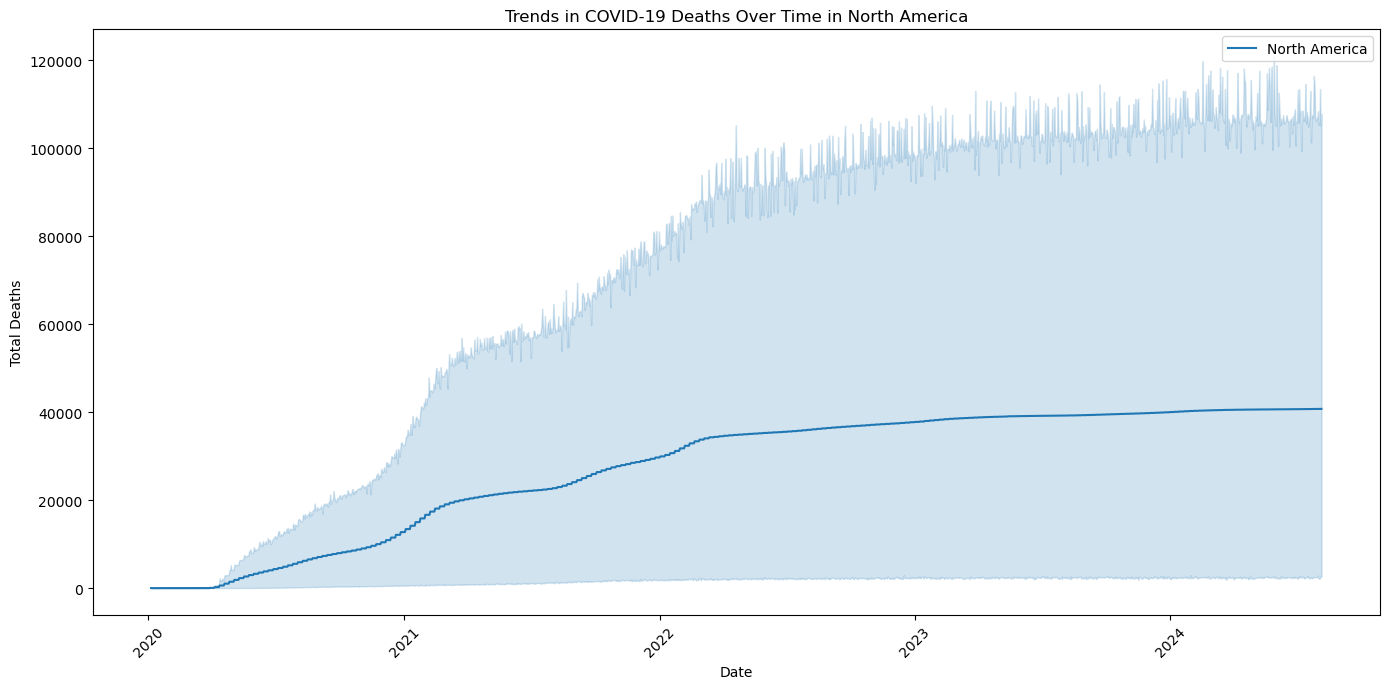

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



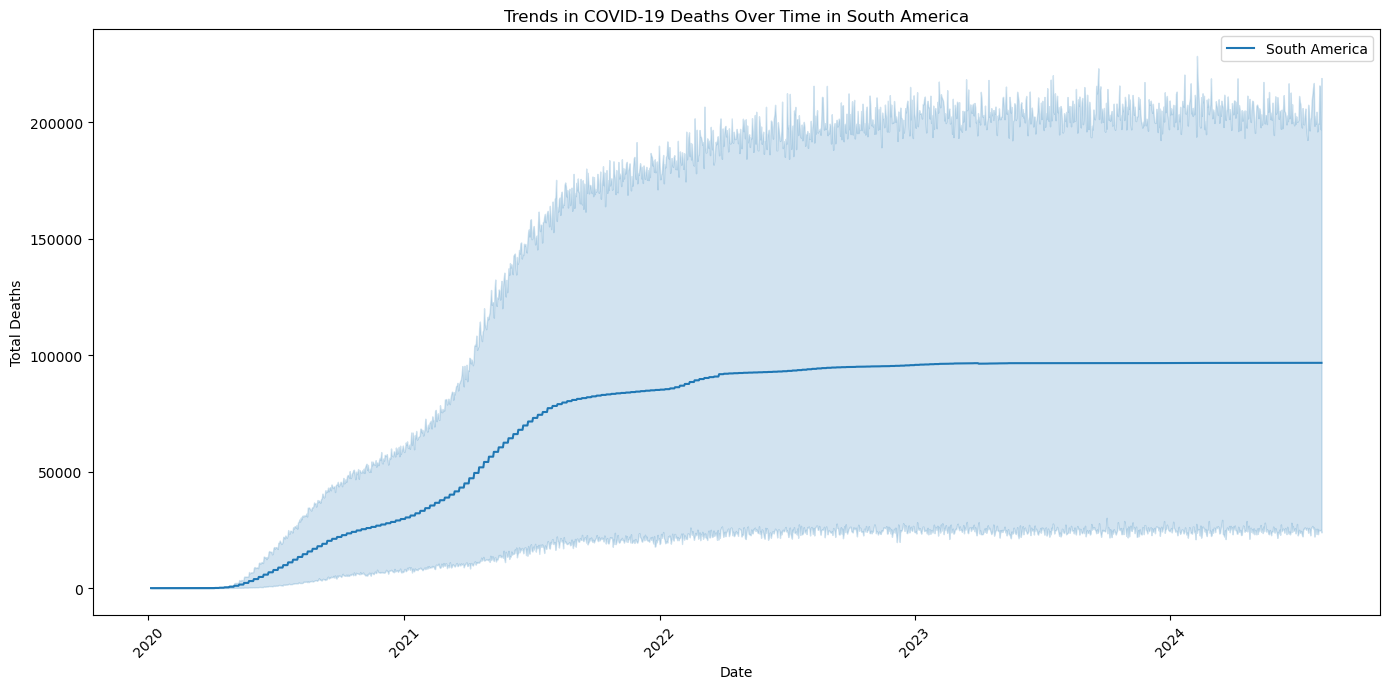

In [21]:
# Plot the trends for deaths in all continents
continents = df['continent'].dropna().unique()
for continent in continents:
    plot_deaths_by_continent(df, continent)
